### This jupyter notebook is to unit-test CFE model run

## Preparation

In [4]:
# Import modules
import json
from bmi_cfe import BMI_CFE

In [5]:
input_json = '../../data/unit_test/config_cfe.json'
params = {
    "forcing_file": "G://Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/Mahurangi/forcing_daily_1998_2001.csv", 
    "time_step_size": 86400,
    "catchment_area_km2": 46.65, 
    "soil_params": {
        "bb": 3, 
        "satdk": 1E-08, 
        "satpsi": 0.33, 
        "slop": 0.552437, 
        "smcmax": 6, 
        "wltsmc": 0.3, 
        "D": 2
        }, 
        "max_gw_storage": 200, 
        "Cgw": 0.01, 
        "expon": 8, 
        "K_nash": 0.3, 
        "refkdt":3, 
        "trigger_z_fact": 0.5, 
        "alpha_fc":0.33, 
        "K_lf": 0.99, 
        "num_nash_storage": 2, 
        "giuh_ordinates": [0.7, 0.3], 
        "stand_alone": 1, 
        "unit_test": 1, 
        "compare_results_file": "G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/Mahurangi/test_daily_1998_2001_sm_basinavg.csv"
        }

with open(input_json, 'w') as outfile:
    json.dump(params, outfile, indent=4)

with open(input_json) as outfile:
    loaded_data = json.load(outfile)

## Run the model

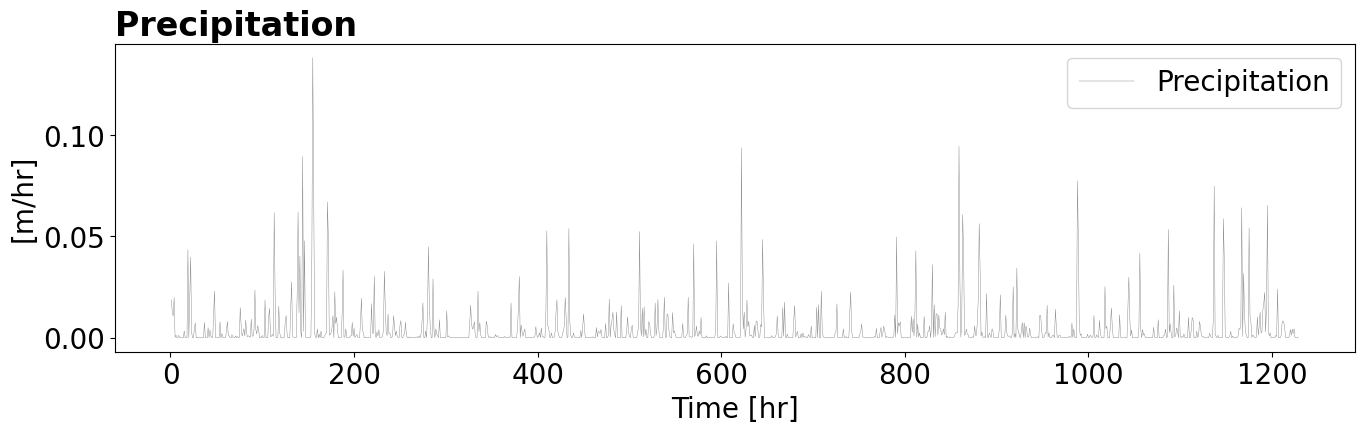

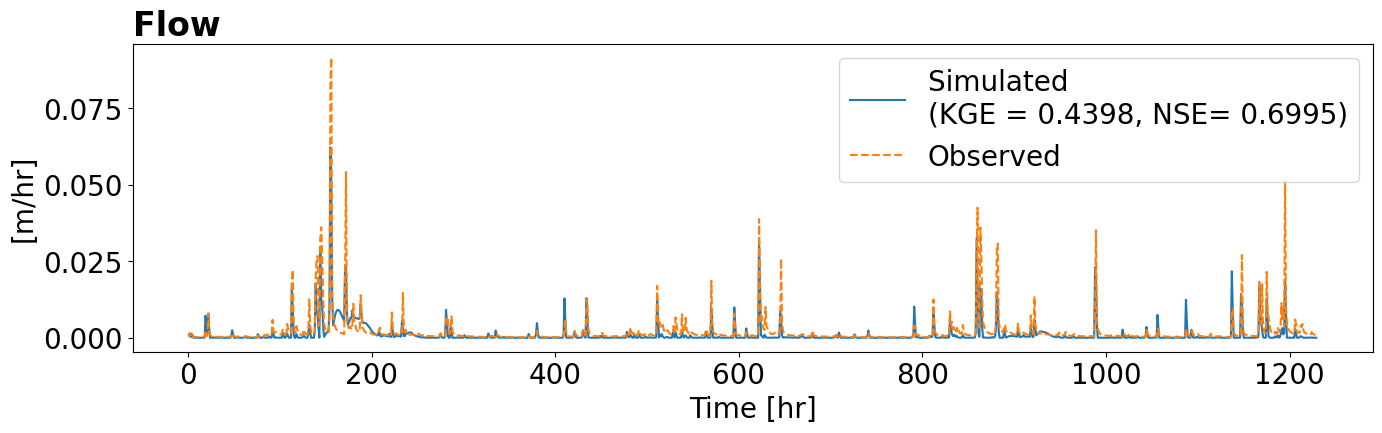

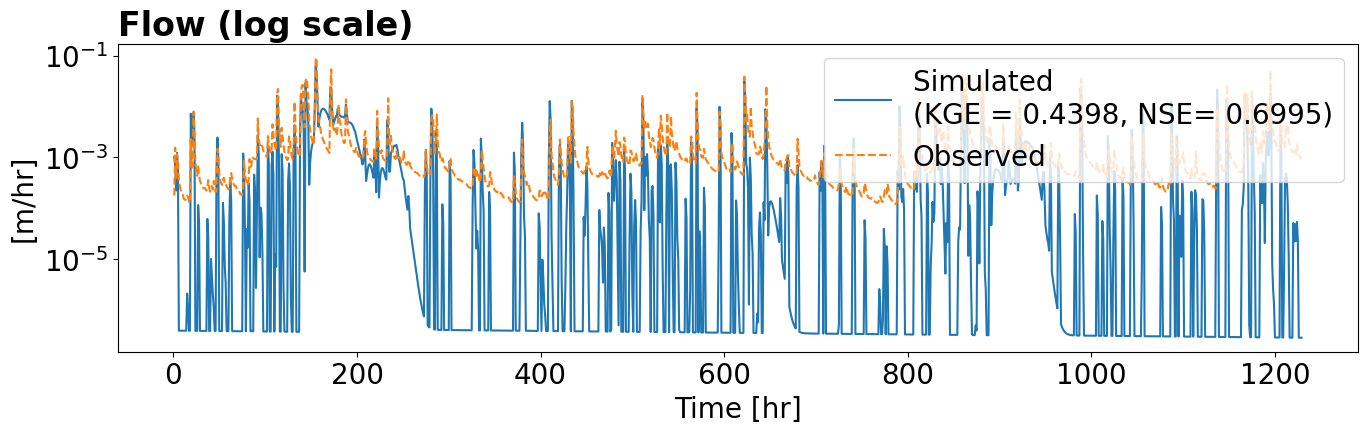

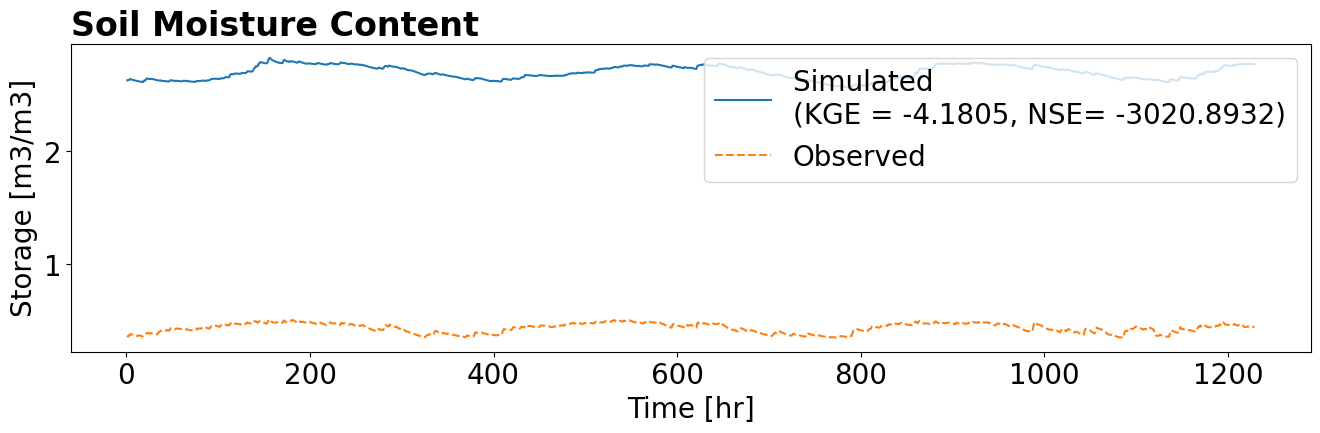

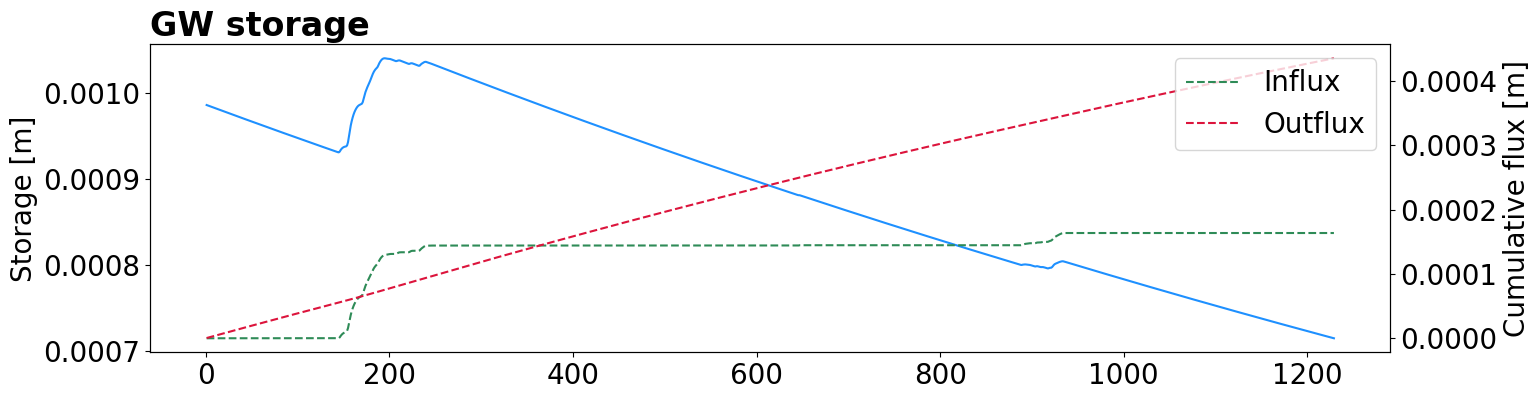

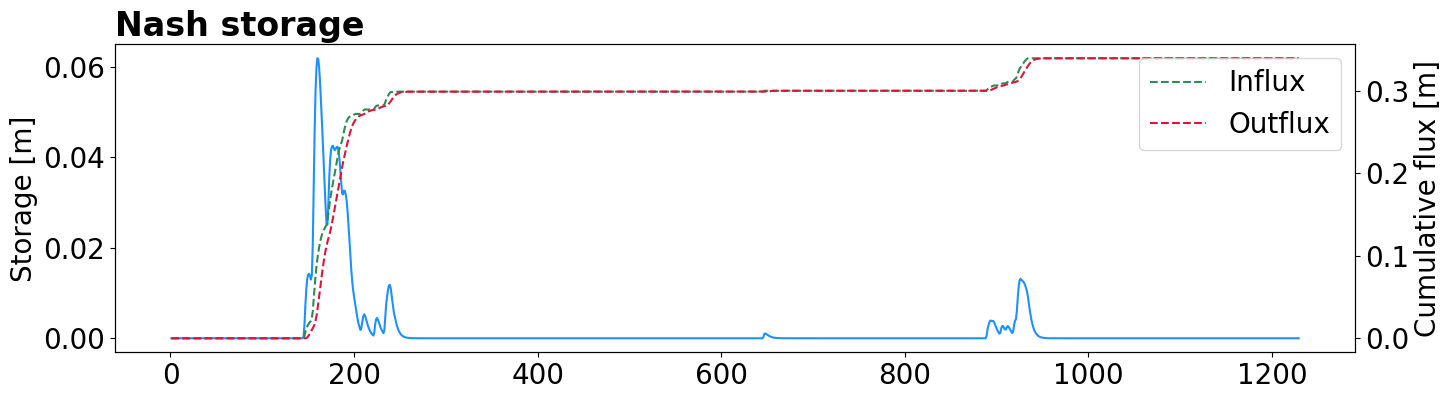

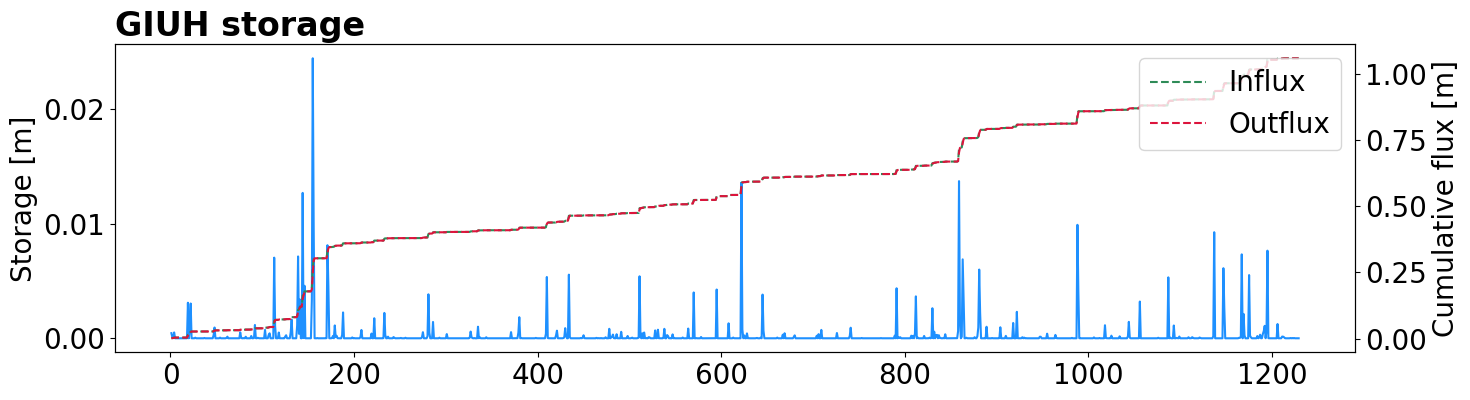


GLOBAL MASS BALANCE
      initial volume:   5.2451
        volume input:   5.9829
       volume output:   5.6148
        final volume:   5.6132
            residual: -4.1853e-06

 Discharge details
Cumulative discharge: 1.62
        Runoff ratio: 0.27
      Surface runoff: 0.73
  Deep GW to channel: 0.00
        Lateral flow: 0.27

 AET & PET
      volume PET:   4.0315
      volume AET:   3.9432
ET from rainfall:   1.2753
    ET from soil:   2.6679

SCHAAKE MASS BALANCE
    volume input:   5.9829
ET from rainfall:   1.2753
  surface runoff:   1.1794
             IOF:   1.1794
             SOF:   0.0000
    infiltration:   3.5282
schaake residual: -3.1086e-15

GIUH MASS BALANCE
  vol. into giuh:   1.1794
   vol. out giuh:   1.1794
 vol. end giuh q:   0.0000
   giuh residual: -4.1853e-06

SOIL WATER CONCEPTUAL RESERVOIR MASS BALANCE
   init soil vol:   5.2441
  vol. into soil:   3.5282
vol.soil2latflow:   0.4917
 vol. soil to gw:   0.0002
 vol. soil to ET:   2.6679
 final vol. soil:   5

In [6]:
cfe_instance = BMI_CFE(input_json)
cfe_instance.initialize()
cfe_instance.run_unit_test(
    plot=True,
    print_fluxes=False,
    plot_lims=list(range(1, 1230)),
    warm_up=True,
    warmup_offset=400,
    warmup_iteration=20
)
cfe_instance.finalize(print_mass_balance=True)